In [414]:
import json

import numpy as np
import pandas as pd

from scipy.optimize import nnls
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_percentage_error

In [431]:
features = pd.read_excel("dataset/jalsh_dataset.xlsx", header=[0, 1], index_col=0, sheet_name="data")
targets = pd.read_excel("dataset/jalsh_dataset_targets.xlsx", index_col=0)

In [432]:
y = targets['RATINGS_SCORE'].dropna()
X = features[y.index].median().unstack()

In [433]:
col = ['ASSET_TO_EQY', 'RETURN_ON_ASSET', 'SALES_GROWTH', 'SALES_TO_TOT_ASSET', ]

In [434]:
X = X.T.dropna().T[col] #[['CASH_TO_TOT_ASSET', 'CFO_TO_TOT_DEBT', 'SALES_TO_TOT_ASSET', 'TOT_DEBT_TO_TOT_ASSET']]
y = y.loc[X.index]

In [435]:
w, r = nnls(X, y)
yhat = (w @ X.T).round(1)
pd.DataFrame(w, X.columns).replace(0, np.nan).dropna()
w.round(2)

array([0.73, 0.3 , 0.08, 1.72])

In [436]:
w.sum()

2.826086242957367

In [426]:
mean_absolute_percentage_error(yhat, y)

2.4552712311226594

In [326]:
yhX.fillna(X.median())[['CASH_TO_TOT_ASSET', 'CFO_TO_TOT_DEBT', 'SALES_TO_TOT_ASSET', 'TOT_DEBT_TO_TOT_ASSET']] @ w

In [327]:
mean_absolute_percentage_error(yh, y)

0.39450089437252184

In [349]:
pd.DataFrame(w, X.columns).replace(0, np.nan).dropna()

,0
Dates,
ASSET_TO_EQY,0.472781
CASH_TO_TOT_ASSET,0.111131
RETURN_ON_ASSET,0.071138
SALES_GROWTH,0.047295
SALES_TO_TOT_ASSET,0.882524
TOTAL_EQUITY,0.000015
TOT_DEBT_TO_TOT_ASSET,0.084349


In [9]:
model_metrics = [
    'bs_tot_asset','oper_margin', 'tot_debt_to_tot_eqy', 'tot_debt_to_ebitda',
    'ebitda_to_tot_int_exp', 'return_on_asset', 'asset_turnover',
]

Index(['asset_turnover', 'bs_lt_borrow', 'bs_st_borrow',
       'bs_total_liabilities', 'bs_tot_asset', 'cfo_to_tot_debt', 'ebitda',
       'ebitda_to_interest_expn', 'ebitda_to_revenue', 'ebitda_to_tot_int_exp',
       'fcf_to_total_debt', 'is_oper_inc', 'net_debt_to_ebitda', 'oper_margin',
       'retained_cash_flow_to_net_debt', 'return_on_asset', 'return_on_cap',
       'return_on_inv_capital', 'sales_growth', 'sales_rev_turn',
       'short_and_long_term_debt', 'total_equity', 'tot_debt_to_ebitda',
       'tot_debt_to_tot_asset', 'tot_debt_to_tot_cap', 'tot_debt_to_tot_eqy'],
      dtype='object')

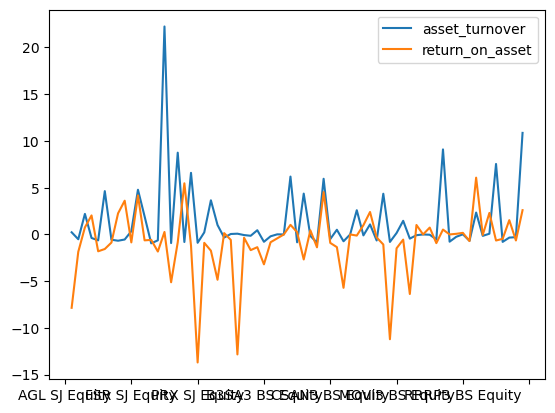

In [13]:
features[["asset_turnover", "return_on_asset"]].pct_change().plot();

In [3]:
model_inputs = {
    "profitability": {
        "class_weight": 0.30,
        "weights": [1.0], 
        "metrics": {
            "oper_margin": {
                "lower_is_better": False,
                "thresholds": [
                    (50, 45),
                     (45, 40),
                     (40, 35),
                     (35, 30),
                     (30, 25),
                     (25, 20),
                     (20, 15),
                     (15, 10),
                     (5, 0)]
            }
        },
    },
    "leverage_coverage": {
        "class_weight": 0.55,
        "weights": [0.3, 0.2, 0.5],
        "metrics": {
            "tot_debt_to_tot_eqy": {
                "lower_is_better": True,
                "thresholds": [
                     (float("-inf"), 2.0),
                     (2.0, 16.0),
                     (16.0, 24.0),
                     (24.0, 33.0),
                     (33.0, 43.0),
                     (43.0, 54.0),
                     (54.0, 68.0),
                     (68.0, 94.0),
                     (94.0, float("inf")),
                ],
            },
            "tot_debt_to_ebitda": {
                "lower_is_better": True,
                "thresholds": [
                    (float("-inf"), 0.09),
                    (0.09, 0.49),
                    (0.49, 0.9),
                    (0.9, 1.36),
                    (1.36, 1.68),
                    (1.68, 2.26),
                    (2.26, 3.27),
                    (3.27, 4.4),
                    (4.4, float("inf")),
                ],
            },
            "ebitda_to_tot_int_exp": {
                "lower_is_better": False,
                "thresholds": [
                    (25, float("inf")),
                    (20, 25),
                    (15, 20),
                    (10, 15),
                    (5, 10),
                    (3, 5),
                    (1, 3),
                    (0, 1),
                    (float("-inf"), 0),
                ],
            },
        },
    },
    "efficiency": {
        "class_weight": 0.15,
        "weights": [0.3, 0.7],
        "metrics": {
            "return_on_asset": {
                "lower_is_better": False,
                "thresholds": [
                    (0.15, float("inf")),
                    (0.10, 0.15),
                    (0.08, 0.10),
                    (0.06, 0.08),
                    (0.04, 0.06),
                    (0.02, 0.04),
                    (0.00, 0.02),
                    (-0.02, 0.00),
                    (float("-inf"), -0.02)
                ],
            },
            "asset_turnover": {
                "lower_is_better": False,
                "thresholds": [
                    (4.0, float("inf")),
                    (3.0, 4.0),
                    (2.0, 3.0),
                    (1.5, 2.0),
                    (1.0, 1.5),
                    (0.75, 1.0),
                    (0.5, 0.75),
                    (0.25, 0.5),
                    (float("-inf"), 0.25)
                ],
            },
        },
    },
}

In [6]:
def get_buckets(min_val, max_val, lower_is_better=False, num_buckets=9):
    """
    Generates optimized buckets based on min, max values, desired number of buckets, and whether lower values are better.

    Args:
        min_val (float): The minimum value.
        max_val (float): The maximum value.
        num_buckets (int, optional): Number of buckets. Defaults to 9.
        lower_is_better (bool, optional): True if lower values are better, else False. Defaults to False.

    Returns:
        list: List of tuples (start, end) representing each bucket's range.
    """
    min_val, max_val = (max_val, min_val) if lower_is_better else (min_val, max_val)
    interval = (max_val - min_val) / (num_buckets - 1)
    buckets = [(round(min_val + i * interval, 2), round(min_val + (i + 1) * interval, 2)) for i in range(num_buckets - 1)]
    buckets.append((round(max_val - interval, 2), max_val))
    return list(reversed(buckets)) if lower_is_better else buckets


# Redefine the values and number of buckets for clarity
min_val = -1
median_val = 3
max_val = 5
num_buckets = 9

# Generate the optimized buckets
buckets_list = get_buckets(min_val, median_val, max_val, num_buckets)
print(buckets_list)

[(-0.5, -1), (-0.5, -1.0), (0.0, -0.5), (0.5, 0.0), (1.0, 0.5), (1.5, 1.0), (2.0, 1.5), (2.5, 2.0), (3.0, 2.5)]


In [282]:
class CreditRatingCalculator:
    def __init__(self, metrics):
        self.metrics = metrics

    def _calculate_metric_score(self, metric, thresholds, inverse):
        for score, (lower, upper) in enumerate(zip(thresholds[:-1], thresholds[1:]), start=1):
            if (inverse and metric <= upper) or (not inverse and metric >= lower):
                return score
        return len(thresholds) // 2  # else return the middle score

    def _calculate_category_score(self, category_metrics, ratios):
        total_weighted_score = 0
        for metric, weight in zip(
            category_metrics["metrics"].items(), category_metrics["weights"]
        ):
            metric_name, metric_data = metric
            value = ratios[metric_name]
            score = self._calculate_metric_score(
                value, metric_data["thresholds"], metric_data["lower_is_better"]
            )
            total_weighted_score += score * weight
        return total_weighted_score

    def _calculate_scores(self, ratios):
        scores = {}
        for category, category_data in self.metrics.items():
            category_score = self._calculate_category_score(category_data, ratios)
            scores[category] = category_score
        return scores

    def _calculate_weighted_score(self, scores):
        weights = {
            category: category_data["class_weight"]
            for category, category_data in self.metrics.items()
        }
        return sum(scores[category] * weight for category, weight in weights.items())

    def _determine_credit_rating(self, weighted_score):
        credit_ratings = {
            "Aaa": 2.5,
            "Aa": 3.5,
            "A": 4.5,
            "Baa": 5.5,
            "Ba": 6.5,
            "B": 7.5,
            "Caa": 8.5,
            "Ca": 9.5,
            "C": float("inf"),
        }
        return next(
            rating
            for rating, threshold in credit_ratings.items()
            if weighted_score <= threshold
        )

    def calculate_credit_rating(self, ratios):
        self.scores = self._calculate_scores(ratios)
        self.credit_score = self._calculate_weighted_score(self.scores)
        self.credit_rating = self._determine_credit_rating(self.credit_score)

In [287]:
class CreditRatingCalculator:
    def __init__(self, metrics):
        self.metrics = metrics
        self.credit_ratings = {
            "Aaa": 2.5,
            "Aa": 3.5,
            "A": 4.5,
            "Baa": 5.5,
            "Ba": 6.5,
            "B": 7.5,
            "Caa": 8.5,
            "Ca": 9.5,
            "C": float("inf"),
        }

    def _calculate_metric_score(self, metric, thresholds, inverse):
        for score, (lower, upper) in enumerate(zip(thresholds[:-1], thresholds[1:]), start=1):
            if (inverse and metric <= upper) or (not inverse and metric >= lower):
                return score
        return len(thresholds) // 2

    def _calculate_category_score(self, category_metrics, ratios):
        return sum(
            self._calculate_metric_score(
                ratios[metric_name],
                metric_data["thresholds"],
                metric_data["lower_is_better"],
            )
            * weight
            for (metric_name, metric_data), weight in zip(
                category_metrics["metrics"].items(), category_metrics["weights"]
            )
        )

    def _calculate_weighted_score(self, ratios):
        return sum(
            self._calculate_category_score(category_data, ratios) * category_data["class_weight"]
            for category_data in self.metrics.values()
        )

    def calculate_credit_rating(self, ratios):
        self.credit_score = self._calculate_weighted_score(ratios)
        return next(
            rating
            for rating, threshold in self.credit_ratings.items()
            if self.credit_score <= threshold
        )


model_inputs = {
    "profitability": {
        "class_weight": 0.30,
        "weights": [1.0],
        "metrics": {
            "oper_margin": {
                "lower_is_better": False,
                "thresholds": [50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0],
            }
        },
    },
    # Add more categories and metrics as needed
}

# Example usage
calculator = CreditRatingCalculator(model_inputs)
ratios = {"oper_margin": 15}  # Add more ratios as needed
credit_rating = calculator.calculate_credit_rating(ratios)
print("Credit Rating:", credit_rating)

Credit Rating: Aaa
